In [1]:
%matplotlib inline
import sys,os
#Add the folder above current workspace to the sys.path variable
sys.path.append(os.path.join(os.getcwd(), '..')) # OS inspecific

from libitmal import reporting

import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns; sns.set()
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import SGDClassifier, LogisticRegression, LinearRegression
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA
from time import time

print('OK')

OK


In [2]:
# Load data
wine_data = pd.read_csv(os.path.join('..', 'datasets', 'winequality-red.csv'))

wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
wine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [5]:
wine_data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


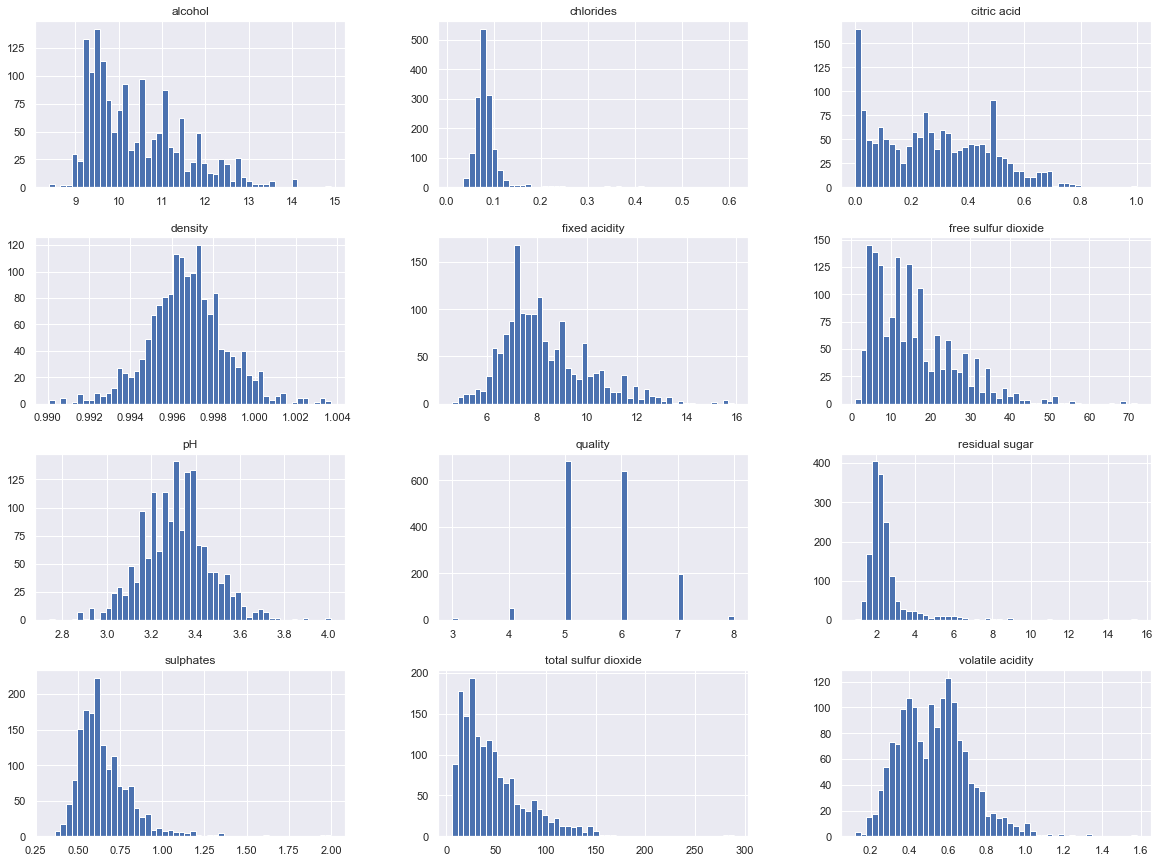

<Figure size 432x288 with 0 Axes>

In [4]:
fig = wine_data.hist(bins=50, figsize=(20,15))
plt.show()

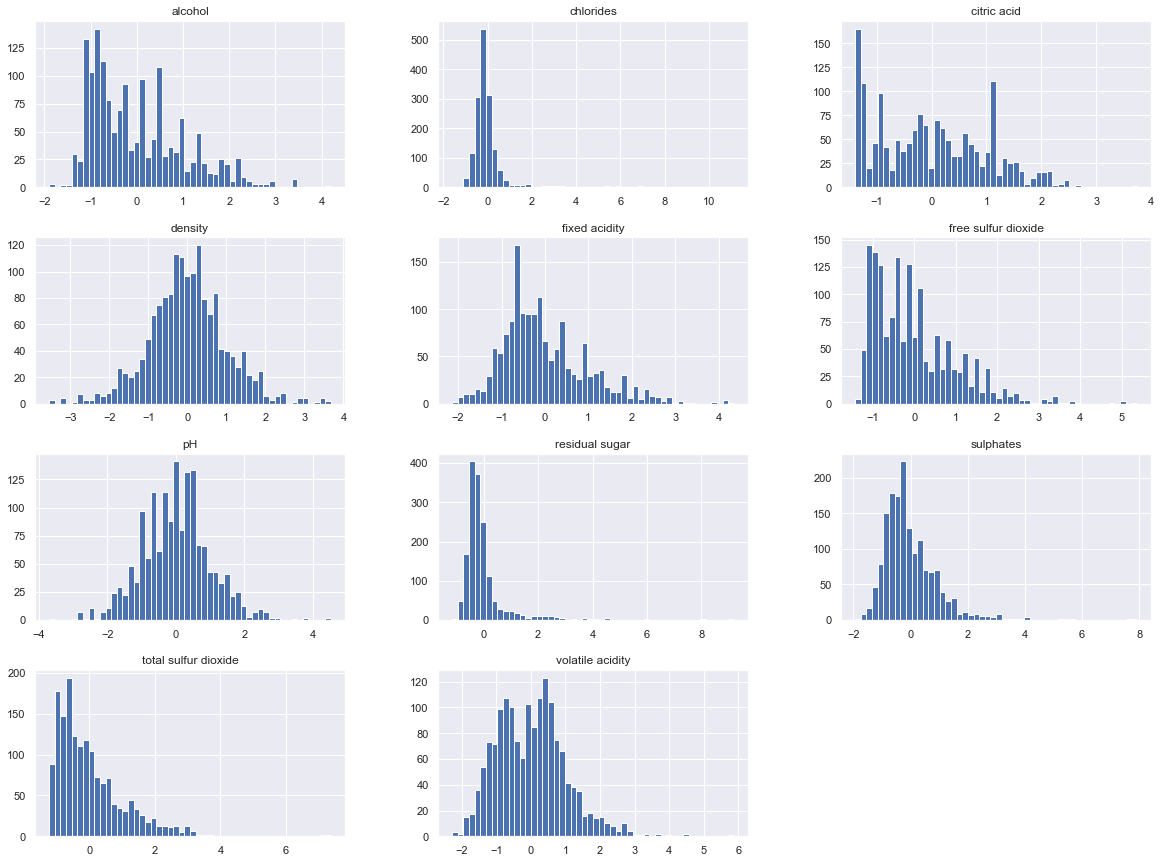

<Figure size 432x288 with 0 Axes>

In [5]:
X = wine_data.iloc[:, 0:11]
y = wine_data["quality"]

std_scaler = StandardScaler()

X = pd.DataFrame(std_scaler.fit_transform(X), columns=X.columns)


X.hist(bins=50, figsize=(20,15))
plt.show()

In [6]:
corr_matrix = wine_data.corr()
print(corr_matrix['quality'].sort_values(ascending=False))

quality                 1.000000
alcohol                 0.476166
sulphates               0.251397
citric acid             0.226373
fixed acidity           0.124052
residual sugar          0.013732
free sulfur dioxide    -0.050656
pH                     -0.057731
chlorides              -0.128907
density                -0.174919
total sulfur dioxide   -0.185100
volatile acidity       -0.390558
Name: quality, dtype: float64


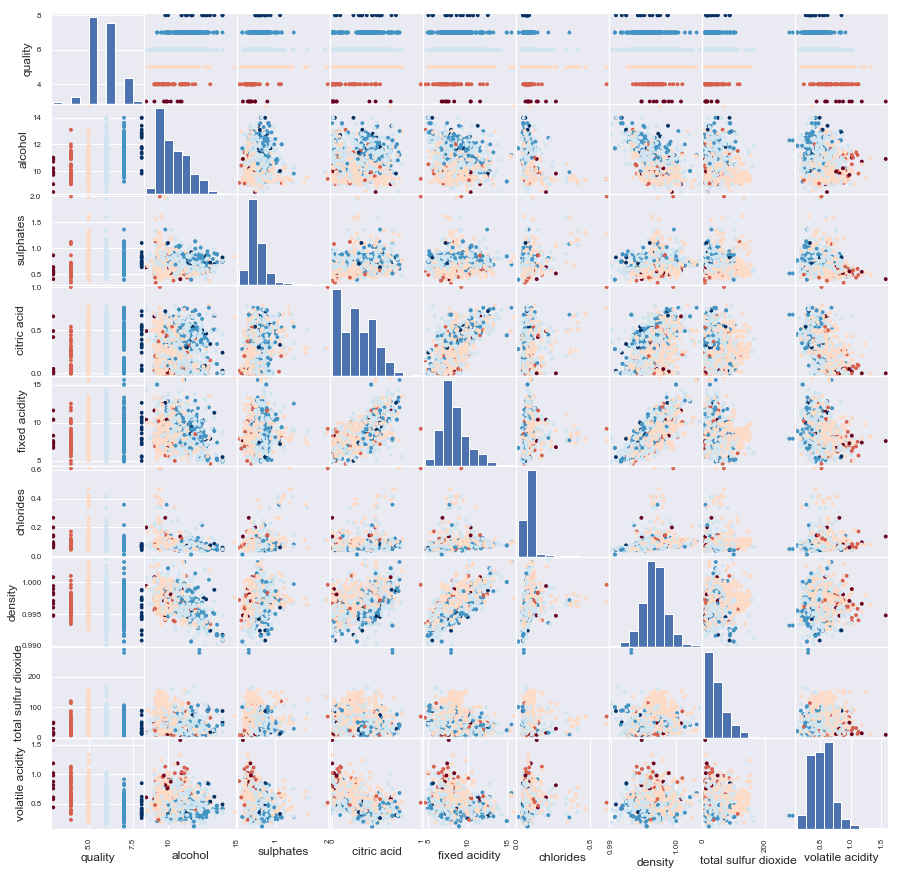

<Figure size 432x288 with 0 Axes>

In [7]:
attributes = ['quality','alcohol','sulphates','citric acid','fixed acidity','chlorides','density','total sulfur dioxide','volatile acidity']
scatter_matrix(wine_data[attributes],c=wine_data['quality'], figsize = (15, 15), s = 60,cmap=plt.cm.get_cmap('RdBu'), alpha=1)
plt.show()

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=46, shuffle=True)

X_train, X_validate, y_train, y_validate = train_test_split(X_train, y_train, test_size=0.1, random_state=46, shuffle=True)

print('OK')

OK


In [9]:
# SGD Classifer
model_sgd = SGDClassifier(random_state=46, max_iter=15000, tol=1e-3)

score = cross_val_score(model_sgd, X_train, y_train, scoring="accuracy", cv=5)
print(score)

[0.47639485 0.48275862 0.53913043 0.56768559 0.55506608]


In [10]:
# Logistic regressor
model_logreg = LogisticRegression(random_state=46, n_jobs=-1, multi_class='multinomial', 
                                penalty='l2', solver='lbfgs')

score = cross_val_score(model_logreg, X_train, y_train, scoring="accuracy", cv=5)
print(score)

[0.55793991 0.64224138 0.61304348 0.57641921 0.60352423]


In [11]:
# Linear regressor
model_linreg = LinearRegression()

score = cross_val_score(model_linreg, X_train, y_train, scoring="r2", cv=5)
print(score)

[0.36856399 0.34245376 0.41329172 0.28514358 0.39116259]


# MLPClassifier med default parametre

In [46]:
# MLP Classifier
model_mlp = MLPClassifier(random_state=46, max_iter=15000)

score = cross_val_score(model_mlp, X_train, y_train, scoring="accuracy", cv=5)
print(score)

[0.60085837 0.63362069 0.60434783 0.63755459 0.57709251]


In [47]:
# Fit, Predict!
model_mlp.fit(X_train, y_train)
y_mlp_pred = model_mlp.predict(X_test)

print('OK')

OK


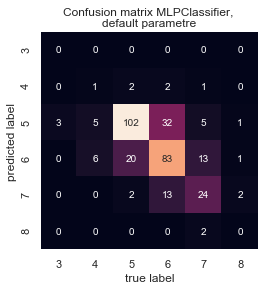

In [48]:
# Calculate confusion matrix and plot results in a heatmap
mat = confusion_matrix(y_test, y_mlp_pred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=['3', '4', '5', '6', '7', '8'], 
            yticklabels=['3', '4', '5', '6', '7', '8'])
plt.xlabel('true label');
plt.ylabel('predicted label');
plt.title('Confusion matrix MLPClassifier, \ndefault parametre')
plt.savefig('mlp_default.pdf')

# MLPClassifier, default parametre, fixed acidity og chlorides dropped

In [16]:
# Restore datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=46, 
                                                    shuffle=True)

X_train, X_validate, y_train, y_validate = train_test_split(X_train, 
                                                            y_train, 
                                                            test_size=0.1, 
                                                            random_state=46, 
                                                            shuffle=True)

# Remove Fixed acidity and chlorides
X_train = X_train.drop(columns=['fixed acidity', 'chlorides'])
X_test = X_test.drop(['fixed acidity', 'chlorides'], axis=1)
X_validate = X_validate.drop(['fixed acidity', 'chlorides'], axis=1)

print('OK')

OK


In [17]:
model_mlp = MLPClassifier(random_state=46, max_iter=15000)
score_dropped = cross_val_score(model_mlp, X_train, y_train, scoring="accuracy", cv=5)
print('Score difference: ', score-score_dropped)

Score difference:  [ 0.02145923  0.0387931   0.0173913   0.10480349 -0.02202643]


In [18]:
# Fit, Predict!
model_mlp.fit(X_train, y_train)
y_mlp_pred = model_mlp.predict(X_test)

print('OK')

OK


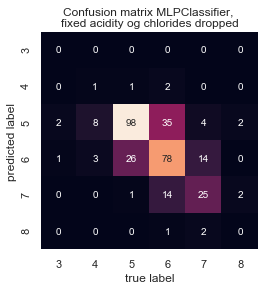

In [20]:
# Calculate confusion matrix and plot results in a heatmap
mat = confusion_matrix(y_test, y_mlp_pred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=['3', '4', '5', '6', '7', '8'], 
            yticklabels=['3', '4', '5', '6', '7', '8'])
plt.xlabel('true label')
plt.ylabel('predicted label');
plt.title('Confusion matrix MLPClassifier, \nfixed acidity og chlorides dropped')
plt.savefig('mlp_no_acid.pdf')

# PCA test - MLPClassifier, default parameters

In [21]:
# Restore datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=46, 
                                                    shuffle=True)

X_train, X_validate, y_train, y_validate = train_test_split(X_train, 
                                                            y_train, 
                                                            test_size=0.1, 
                                                            random_state=46, 
                                                            shuffle=True)
print('OK')

OK


In [22]:
pca = PCA(n_components=0.99)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.fit_transform(X_test)
X_validate_pca = pca.fit_transform(X_validate)

print('OK')

OK


In [23]:
score_pca = cross_val_score(model_mlp, X_train_pca, y_train, scoring="accuracy", cv=5)
print('Score difference: ', score-score_pca)
print('Score after PCA: ', score_pca)

Score difference:  [-0.00858369 -0.01724138 -0.0173913   0.04366812 -0.030837  ]
Score after PCA:  [0.60944206 0.65086207 0.62173913 0.59388646 0.60792952]


In [24]:
# Fit, Predict!
model_mlp.fit(X_train_pca, y_train)
y_mlp_pred = model_mlp.predict(X_test_pca)
print('OK')

OK


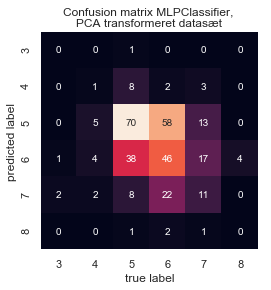

In [25]:
# Calculate confusion matrix and plot results in a heatmap
mat = confusion_matrix(y_test, y_mlp_pred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=['3', '4', '5', '6', '7', '8'], 
            yticklabels=['3', '4', '5', '6', '7', '8'])
plt.xlabel('true label')
plt.ylabel('predicted label');
plt.title('Confusion matrix MLPClassifier, \nPCA transformeret datasæt')
plt.savefig('mlp_pca.pdf')

# Grid search for MLPClassifier

In [37]:
# Grid search
model_mlp = MLPClassifier(random_state=46, max_iter=15000, shuffle=True)

tuning_parameters = {
    'hidden_layer_sizes': [10, 50, 100, 200, 300],
    'activation': ['relu', 'tanh', 'logistic', 'identity'],
    'solver': ['sgd', 'adam', 'lbfgs'],
    'alpha': [0.0001, 0.001, 0.0005],
    'tol':[1e-3, 2e-3, 5e-2, 1e-4],
}

CV=5
VERBOSE=0

# Run GridSearchCV for the model
start = time()
grid_tuned = GridSearchCV(model_mlp, tuning_parameters, cv=CV, scoring='f1_micro', verbose=VERBOSE, n_jobs=-1, iid=True)
grid_tuned.fit(X_train, y_train)
t = time()-start

In [38]:
# Report
b0, m0 = reporting.FullReport(grid_tuned , X_test, y_test, t)

SEARCH TIME: 1200.97 sec

Best model set found on train set:

	best parameters={'activation': 'relu', 'alpha': 0.001, 'hidden_layer_sizes': 200, 'solver': 'adam', 'tol': 0.0001}
	best 'f1_micro' score=0.6264118158123371
	best index=103

Best estimator CTOR:
	MLPClassifier(activation='relu', alpha=0.001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=200, learning_rate='constant',
       learning_rate_init=0.001, max_iter=15000, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=46, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

Grid scores ('f1_micro') on development set:
	[ 0]: 0.573 (+/-0.069) for {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': 10, 'solver': 'sgd', 'tol': 0.001}
	[ 1]: 0.569 (+/-0.054) for {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': 10, 'solver': 'sgd', 'tol': 0

C:\Users\Bjarke\Anaconda3\envs\itmal\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Bjarke\Anaconda3\envs\itmal\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Bjarke\Anaconda3\envs\itmal\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [26]:
# Compare gridsearched model with default mlp
model_mlp = MLPClassifier(activation='relu', 
                          alpha=0.001, 
                          batch_size='auto', 
                          beta_1=0.9,
                          beta_2=0.999, 
                          early_stopping=False, 
                          epsilon=1e-08,
                          hidden_layer_sizes=200, 
                          learning_rate='constant',
                          learning_rate_init=0.001, 
                          max_iter=15000, 
                          momentum=0.9,       
                          n_iter_no_change=10, 
                          nesterovs_momentum=True, 
                          power_t=0.5,
                          random_state=46, 
                          shuffle=True, 
                          solver='adam', 
                          tol=0.0001,
                          validation_fraction=0.1, 
                          verbose=False, 
                          warm_start=False)

score_grid = cross_val_score(model_mlp, X_train, y_train, scoring="accuracy", cv=5)

print('Score difference: score-score_grid', score-score_grid)
print('Score grid: ', score_grid)

Score difference: score-score_grid [-0.00429185 -0.00431034 -0.05217391  0.03056769 -0.04845815]
Score grid:  [0.60515021 0.63793103 0.65652174 0.6069869  0.62555066]


In [27]:
# Fit, Predict!
model_mlp.fit(X_train, y_train)
y_mlp_pred = model_mlp.predict(X_test)
print('OK')

OK


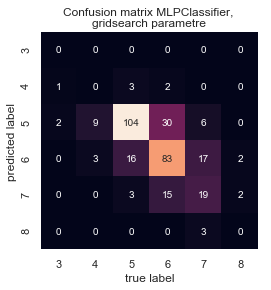

In [29]:
# Calculate confusion matrix and plot results in a heatmap
mat = confusion_matrix(y_test, y_mlp_pred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=['3', '4', '5', '6', '7', '8'], 
            yticklabels=['3', '4', '5', '6', '7', '8'])
plt.xlabel('true label')
plt.ylabel('predicted label');
plt.title('Confusion matrix MLPClassifier, \ngridsearch parametre')
plt.savefig('mlp_grid_search.pdf')

# Test for binary data -MLPClassifier default

In [37]:
# Convert to binary
bins = (2, 5.5, 8)
group_names = ['Bad', 'Good']

y_binary = pd.cut(wine_data['quality'], bins=bins, labels=group_names)

label_quality = LabelEncoder()
y_binary = pd.Series(label_quality.fit_transform(y_binary))
y_binary.value_counts()

1    855
0    744
dtype: int64

In [38]:
# Split binary dataset
X_train, X_test, y_train, y_test = train_test_split(X, y_binary, 
                                                    test_size=0.2, 
                                                    random_state=46, 
                                                    shuffle=True)

X_train, X_validate, y_train, y_validate = train_test_split(X_train, 
                                                            y_train, 
                                                            test_size=0.1, 
                                                            random_state=46, 
                                                            shuffle=True)

In [39]:
model_mlp = MLPClassifier(random_state=46, max_iter=15000)
score_binary = cross_val_score(model_mlp, X_train, y_train, scoring="accuracy", cv=5)

print('Score difference: ', score-score_binary)
print('Score binary: ', score_binary)

Score difference:  [-0.1653754  -0.12724888 -0.15652174 -0.11896715 -0.18377705]
Score binary:  [0.76623377 0.76086957 0.76086957 0.75652174 0.76086957]


In [40]:
# Fit, Predict!
model_mlp.fit(X_train, y_train)
y_mlp_pred = model_mlp.predict(X_test)
print('OK')

OK


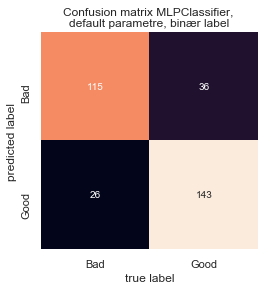

In [41]:
# Calculate confusion matrix and plot results in a heatmap
mat = confusion_matrix(y_test, y_mlp_pred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=['Bad', 'Good'], 
            yticklabels=['Bad', 'Good'])
plt.xlabel('true label')
plt.ylabel('predicted label');
plt.title('Confusion matrix MLPClassifier, \ndefault parametre, binær label')
plt.savefig('mlp_binary_default.pdf')

# Grid search for binary data

In [53]:
# Grid search
model_mlp = MLPClassifier(random_state=46, max_iter=15000, shuffle=True)

tuning_parameters = {
    'hidden_layer_sizes': [10, 50, 100, 200, 300],
    'activation': ['relu', 'tanh', 'logistic', 'identity'],
    'solver': ['sgd', 'adam', 'lbfgs'],
    'alpha': [0.0001, 0.001, 0.0005],
    'tol':[1e-3, 2e-3, 5e-2, 1e-4],
}

CV=5
VERBOSE=0

# Run GridSearchCV for the model
start = time()
grid_tuned_binary = GridSearchCV(model_mlp, tuning_parameters, cv=CV, scoring='f1_micro', verbose=VERBOSE, n_jobs=-1, iid=True)
grid_tuned_binary.fit(X_train, y_train)
t = time()-start

In [54]:
# Report
b0, m0 = reporting.FullReport(grid_tuned , X_test, y_test, t)

SEARCH TIME: 412.25 sec

Best model set found on train set:

	best parameters={'activation': 'relu', 'alpha': 0.001, 'hidden_layer_sizes': 200, 'solver': 'adam', 'tol': 0.0001}
	best 'f1_micro' score=0.6264118158123371
	best index=103

Best estimator CTOR:
	MLPClassifier(activation='relu', alpha=0.001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=200, learning_rate='constant',
       learning_rate_init=0.001, max_iter=15000, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=46, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

Grid scores ('f1_micro') on development set:
	[ 0]: 0.573 (+/-0.069) for {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': 10, 'solver': 'sgd', 'tol': 0.001}
	[ 1]: 0.569 (+/-0.054) for {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': 10, 'solver': 'sgd', 'tol': 0.

C:\Users\Bjarke\Anaconda3\envs\itmal\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Bjarke\Anaconda3\envs\itmal\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Bjarke\Anaconda3\envs\itmal\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Bjarke\Anaconda3\envs\itmal\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', ave

In [42]:
model_mlp_binary = MLPClassifier(activation='relu', 
                                 alpha=0.001, 
                                 batch_size='auto', 
                                 beta_1=0.9,      
                                 beta_2=0.999, 
                                 early_stopping=False, 
                                 epsilon=1e-08,       
                                 hidden_layer_sizes=200, 
                                 learning_rate='constant',       
                                 learning_rate_init=0.001, 
                                 max_iter=15000, 
                                 momentum=0.9,       
                                 n_iter_no_change=10, 
                                 nesterovs_momentum=True, 
                                 power_t=0.5,       
                                 random_state=46, 
                                 shuffle=True, 
                                 solver='adam', 
                                 tol=0.0001,       
                                 validation_fraction=0.1, 
                                 verbose=False, 
                                 warm_start=False)

score_binary_grid = cross_val_score(model_mlp_binary, X_train, y_train, scoring="accuracy", cv=5)

print('Score difference: score_binary-score_binary_grid', score_binary-score_binary_grid)
print('Score binary grid: ', score_binary_grid)

Score difference: score_binary-score_binary_grid [ 0.004329   -0.00434783 -0.02173913  0.02608696  0.00869565]
Score binary grid:  [0.76190476 0.76521739 0.7826087  0.73043478 0.75217391]


In [43]:
# Fit, Predict!
model_mlp_binary.fit(X_train, y_train)
y_mlp_pred = model_mlp_binary.predict(X_test)
print('OK')

OK


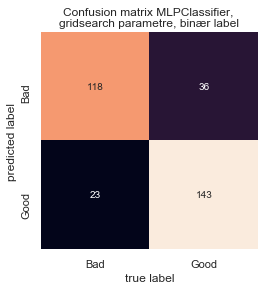

In [44]:
# Calculate confusion matrix and plot results in a heatmap
mat = confusion_matrix(y_test, y_mlp_pred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=['Bad', 'Good'], 
            yticklabels=['Bad', 'Good'])
plt.xlabel('true label')
plt.ylabel('predicted label');
plt.title('Confusion matrix MLPClassifier, \ngridsearch parametre, binær label')
plt.savefig('mlp_binary_grid_search.pdf')